# Rule Based Counting on Product Graphs
In this notebook we will use the performant cycle counting approach (basis cycles and chordless cycles) and count the number of cycles in the product graph. However, we will use additional rules to discern between different categories of cycles. This will further help the expressivity of the approach.

In [1]:
import networkx as nx

from product.factor import get_factor_dict
from generator import generate_graph_product_table
from counting import BasisCycleEmbedding, ChordlessCycleEmbedding, StructRule
from compare import compare_embeddings
from visual import plot_collisions

In [2]:
Gs = [G for G in nx.graph_atlas_g() if not nx.is_empty(G) and nx.is_connected(G)]

In [3]:
factors = get_factor_dict([3, 5, 7], sep_self_loop_node=True)
graph_products = generate_graph_product_table(Gs, products=["Modular"], factors=factors)

In [4]:
def test_rule(embedder, rule=None, size=600):
    if rule is None:
        rule = StructRule(lambda G, S: None, [None])

    product_embeddings = graph_products.map(lambda G: embedder(G, size, rule))
    product_collisions = product_embeddings.map(lambda x: compare_embeddings(x, index=True))
    return product_collisions


In [5]:
def edge_color_decider(graph, cycle):
    all_c1 = True
    all_c2 = True
    for i in range(len(cycle)):
        edge_attr = graph.get_edge_data(cycle[i], cycle[(i + 1) % len(cycle)])
        if edge_attr["condition"] != 1:
            all_c1 = False
        if edge_attr["condition"] != 2:
            all_c2 = False
    if all_c1 and not all_c2:
        return "C1"
    if all_c2 and not all_c1:
        return "C2"
    return "Any"
edge_color_rule = StructRule(edge_color_decider, ["C1", "C2", "Any"])

considered_degrees = list(range(2, 6))
def average_degree_decider(graph, cycle):
    avg_deg = sum(graph.degree(v) for v in cycle) / len(cycle)
    closest_considered_degree = min(considered_degrees, key=lambda x: abs(x - avg_deg))
    return closest_considered_degree

avg_degree_rule = StructRule(average_degree_decider, considered_degrees)


combined_rule = edge_color_rule + avg_degree_rule

## Basis Cycles

In [6]:
basis_cycle_embedder = BasisCycleEmbedding()

### Baseline

In [7]:

original_basis_cycle_embeddings = basis_cycle_embedder(Gs, 100)
original_basis_cycle_collisions = compare_embeddings(original_basis_cycle_embeddings, index=True)

basis_cycle_product_collisions = test_rule(basis_cycle_embedder)

print(f"Original basis cycle collisions: {original_basis_cycle_collisions[0]}")
print(f"After product:")
basis_cycle_product_collisions.map(lambda x: x[0])

Original basis cycle collisions: 14239
After product:


Graph Product,Modular
Factor Graph,
K3,6
K5,5
K7,6
P3,16
P5,5
P7,2
S3,7
S5,8
S7,7


### Edge Coloring

In [8]:
basis_edge_color_product_collisions = test_rule(basis_cycle_embedder, edge_color_rule)

print(f"After product:")
basis_edge_color_product_collisions.map(lambda x: x[0])

After product:


Graph Product,Modular
Factor Graph,
K3,5
K5,5
K7,5
P3,5
P5,2
P7,2
S3,7
S5,7
S7,7


### Average Degree

In [9]:
basis_avg_degree_product_collisions = test_rule(basis_cycle_embedder, avg_degree_rule)

print(f"After product:")
basis_avg_degree_product_collisions.map(lambda x: x[0])

After product:


Graph Product,Modular
Factor Graph,
K3,6
K5,5
K7,6
P3,16
P5,5
P7,2
S3,7
S5,8
S7,7


With this improvement, we do not only increase the expressivity by taking the creation rule of the edges of the cycle into account but further ensure, that the cycle counting on the graph product is not less expressive than the cycle counting on the original graphs.

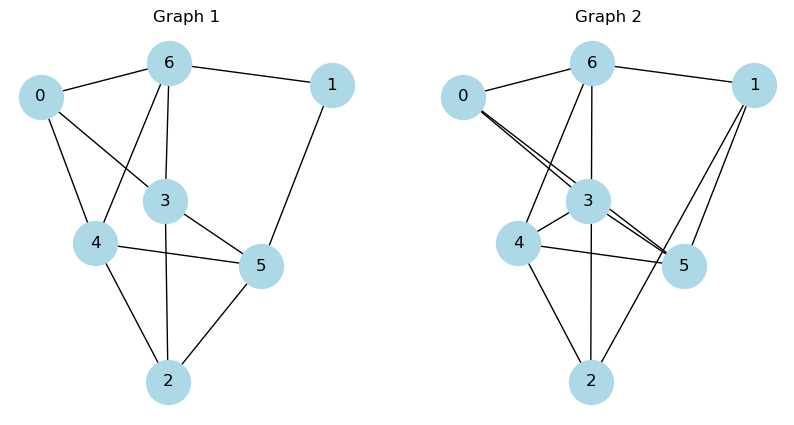

Graph Product,Modular
Factor Graph,
K3,1
K5,1
K7,1
P3,2
P5,1
P7,1
S3,3
S5,3
S7,3


In [10]:
persistent_collisison = basis_edge_color_product_collisions.map(lambda x: x[1] - original_basis_cycle_collisions[1])


plot_collisions(persistent_collisison.loc['K3', 'Modular'], Gs, num_examples=5, fix_positions=True, contains_cycle=True)
persistent_collisison.map(lambda x: len(x))

## Chordless Cycles

In [11]:
chordless_cycle_embedder = ChordlessCycleEmbedding()

### Baseline

In [12]:

original_chordless_cycle_embeddings = chordless_cycle_embedder(Gs, 100)
original_chordless_cycle_collisions = compare_embeddings(original_chordless_cycle_embeddings, index=True)

chordless_cycle_product_collisions = test_rule(chordless_cycle_embedder)

print(f"Original chordless cycle collisions: {original_chordless_cycle_collisions[0]}")
print(f"After product:")
chordless_cycle_product_collisions.map(lambda x: x[0])

Original chordless cycle collisions: 6989
After product:


Graph Product,Modular
Factor Graph,
K3,0
K5,0
K7,0
P3,0
P5,0
P7,0
S3,0
S5,0
S7,0


### Edge Coloring

In [13]:
chordless_edge_color_product_collisions = test_rule(chordless_cycle_embedder, edge_color_rule)

print(f"After product:")
chordless_edge_color_product_collisions.map(lambda x: x[0])

After product:


Graph Product,Modular
Factor Graph,
K3,0
K5,0
K7,0
P3,0
P5,0
P7,0
S3,0
S5,0
S7,0


### Average Degree

In [14]:
chordless_avg_degree_product_collisions = test_rule(chordless_cycle_embedder, avg_degree_rule)

print(f"After product:")
chordless_avg_degree_product_collisions.map(lambda x: x[0])

After product:


Graph Product,Modular
Factor Graph,
K3,0
K5,0
K7,0
P3,0
P5,0
P7,0
S3,0
S5,0
S7,0


With this improvement, we do not only increase the expressivity by taking the creation rule of the edges of the cycle into account but further ensure, that the cycle counting on the graph product is not less expressive than the cycle counting on the original graphs.

In [15]:
chordless_persistent_collisison = chordless_edge_color_product_collisions.map(lambda x: x[1] - original_chordless_cycle_collisions[1])

plot_collisions(chordless_persistent_collisison.loc['K3', 'Modular'], Gs, num_examples=5, fix_positions=True, contains_cycle=True)
chordless_persistent_collisison.map(lambda x: len(x))

Graph Product,Modular
Factor Graph,
K3,0
K5,0
K7,0
P3,0
P5,0
P7,0
S3,0
S5,0
S7,0
